### This dataset is about Breast Cancer classification. Cancer is categorized into two categories: Malignant (M) and Benign (B)

- Objective of this code is to build a classifier for accurately predicting the diagnosis of breast cancer. 
- I am employing Random forest, Support vector machine and Multilayer perceptron algorithms to build a classifier and also performing hyperparameter tuning using GridSeachCV to find optimal hyperparameter for out model.
- Finally, I have also shown feature extraction method with 'Pearson's correlation coefficient' and 'LassoCV' method.

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
df = pd.read_csv('breast-cancer.csv')

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
df.shape #rows and columns of the data

(569, 32)

In [5]:
#checking for missing values
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
# seeing the different data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
#droppong the 'id' columns as it just contains the information about id 
df = df.drop("id", axis = 1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


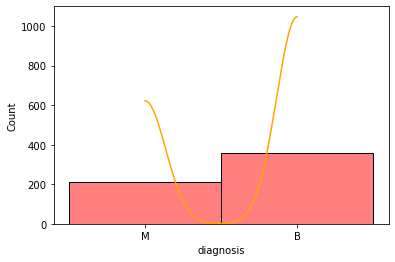

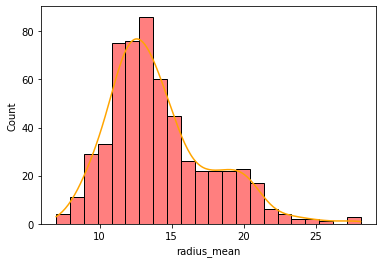

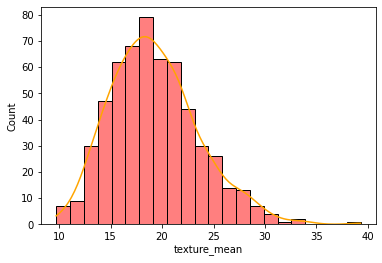

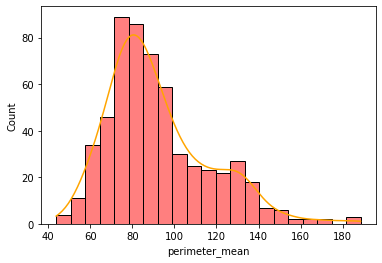

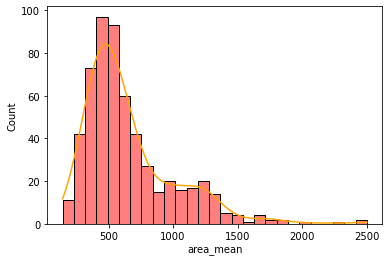

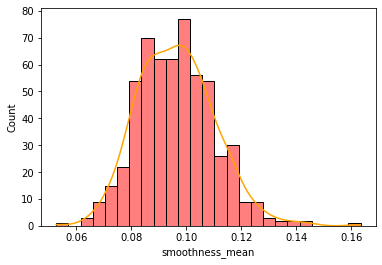

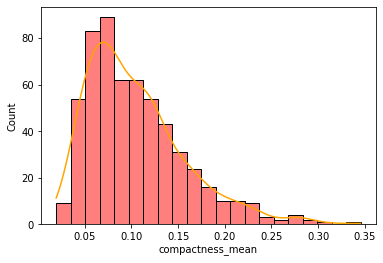

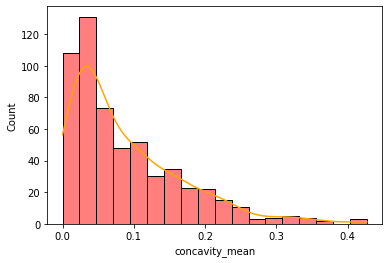

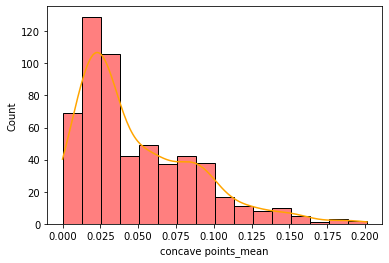

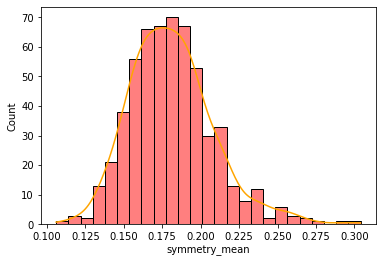

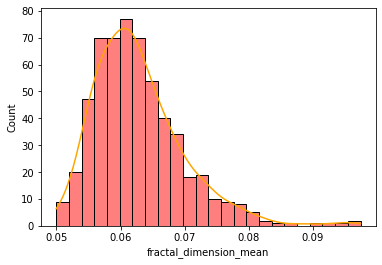

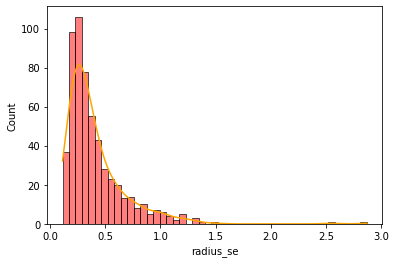

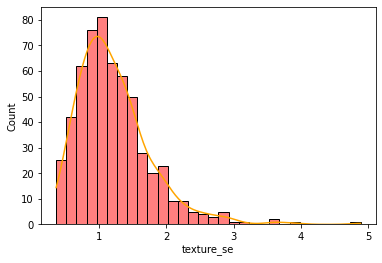

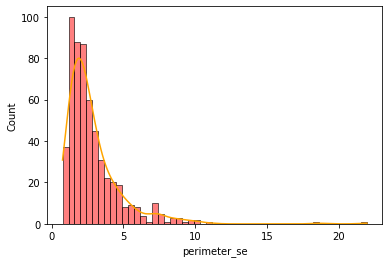

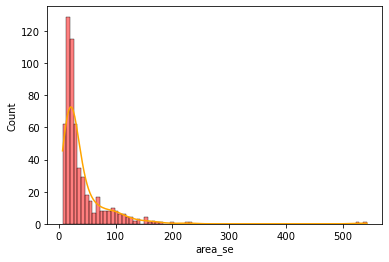

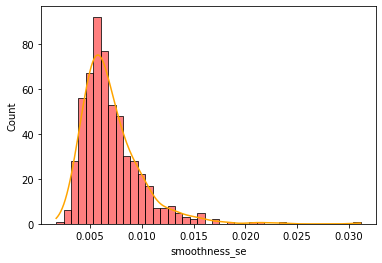

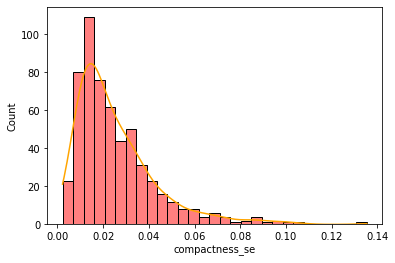

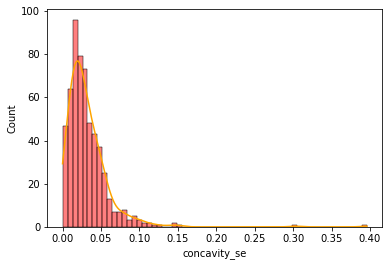

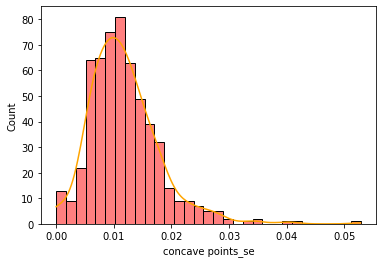

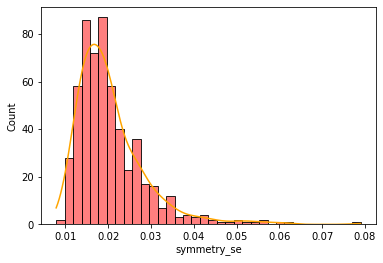

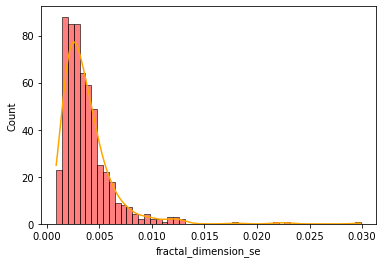

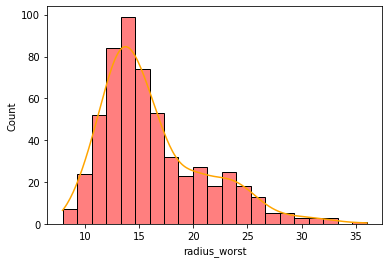

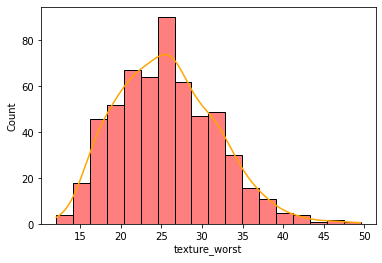

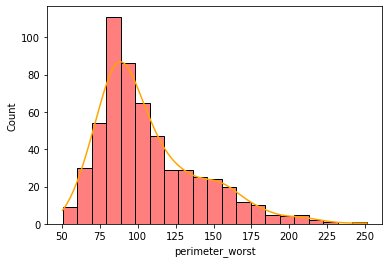

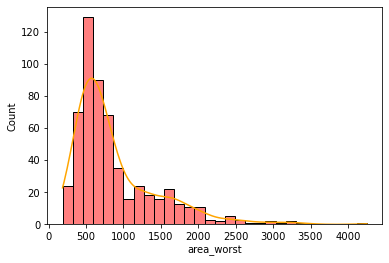

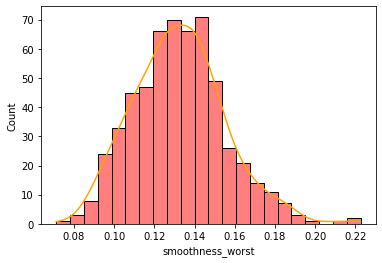

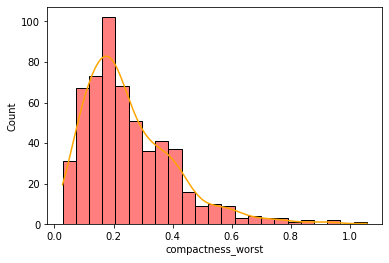

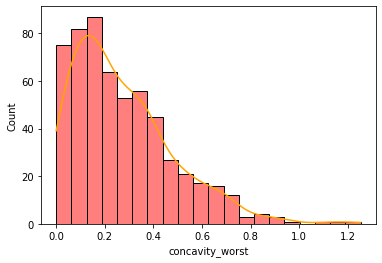

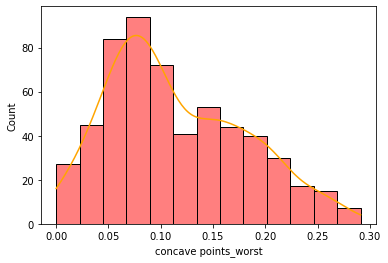

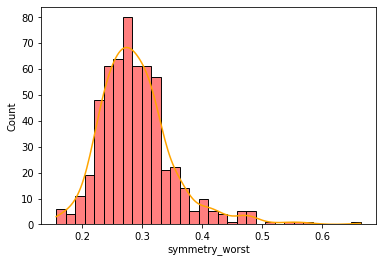

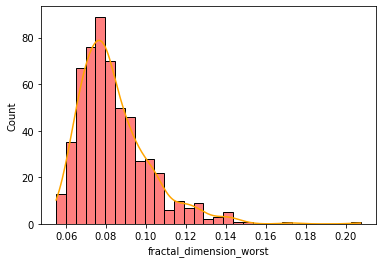

In [8]:
#seeing the distribution of every column
import seaborn as sns
for i in df.columns:
    ax = sns.histplot(df, x = i, kde = True, color = "red")
    ax.lines[0].set_color("orange")
    plt.show()

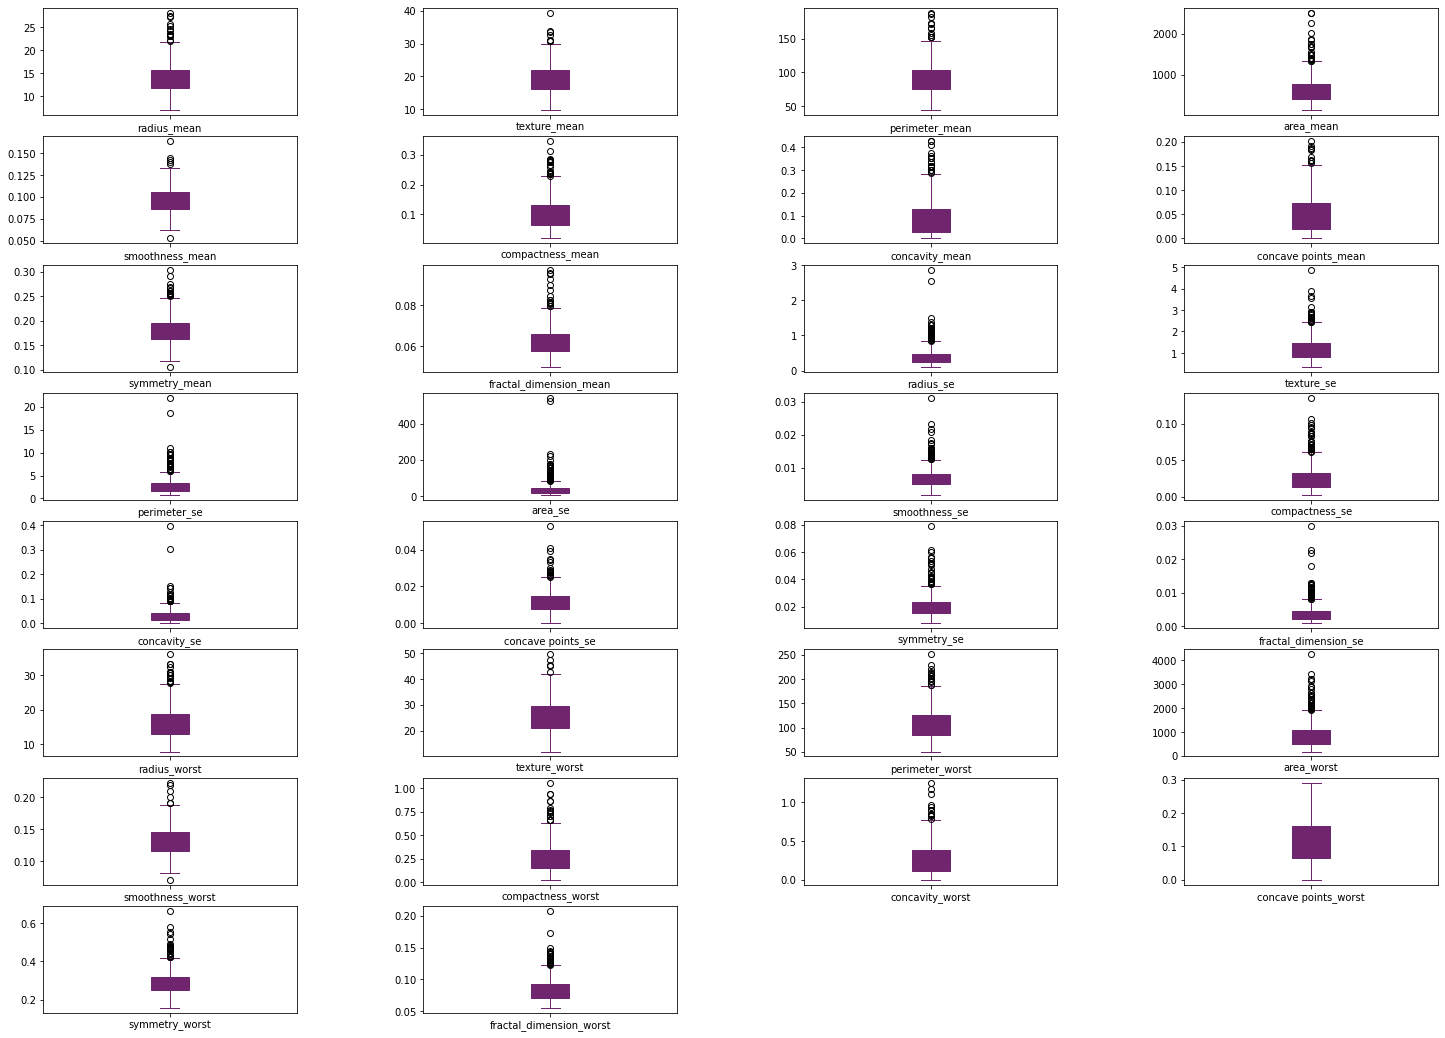

In [9]:
import matplotlib.pyplot as plt
# plotting box plot for visualizing outliers

nums = df.select_dtypes(exclude=["object"])
nums.plot(subplots = True , kind ='box', layout = (15,4), figsize = (25,35), patch_artist= True ,color = "#6F266E")
plt.subplots_adjust(wspace = 0.5)
plt.style.use("ggplot")
plt.show()

<AxesSubplot:>

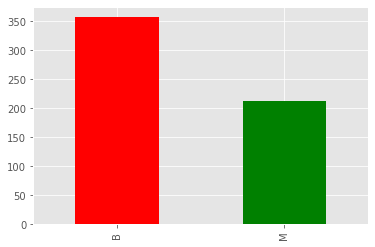

In [11]:
df["diagnosis"].value_counts().plot(kind = "bar", color = ["red", "green"]) #visualizing the categories of our target variable

In [12]:
# converting the data from label column in to '0' if it is Benign, otherwise '1' if it is Malignant, because it is our target variable
df['diagnosis'] = df.diagnosis.map(lambda x: 0 if x == 'B' else 1)

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
#removing the outliers out of z-score of 3
from scipy import stats

df1 = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [18]:
df1.shape

(495, 31)

In [19]:
#correlation matrix
df1.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.741254,0.407111,0.754245,0.745664,0.304018,0.602065,0.752845,0.790748,0.293594,...,0.795813,0.443358,0.801401,0.785407,0.387885,0.583941,0.688232,0.779945,0.383165,0.316421
radius_mean,0.741254,1.000000,0.303868,0.998347,0.992124,0.105271,0.529787,0.725085,0.816742,0.127734,...,0.972976,0.281921,0.967128,0.953473,0.084623,0.458968,0.603564,0.752516,0.176453,0.043659
texture_mean,0.407111,0.303868,1.000000,0.309929,0.309598,-0.022729,0.239106,0.319993,0.281939,0.071375,...,0.332738,0.908867,0.341368,0.331967,0.079620,0.259470,0.303768,0.277020,0.098382,0.111614
perimeter_mean,0.754245,0.998347,0.309929,1.000000,0.990969,0.138133,0.573963,0.757549,0.841477,0.153934,...,0.974861,0.288575,0.973101,0.955845,0.113952,0.497411,0.635056,0.776930,0.196081,0.082954
area_mean,0.745664,0.992124,0.309598,0.990969,1.000000,0.107853,0.522228,0.732061,0.821292,0.134208,...,0.972647,0.283500,0.966550,0.968340,0.094481,0.443513,0.597134,0.742652,0.170612,0.045649
smoothness_mean,0.304018,0.105271,-0.022729,0.138133,0.107853,1.000000,0.632260,0.464609,0.508513,0.516732,...,0.161530,0.027220,0.178895,0.162405,0.793997,0.403701,0.366044,0.446014,0.331749,0.458146
compactness_mean,0.602065,0.529787,0.239106,0.573963,0.522228,0.632260,1.000000,0.867824,0.825167,0.513492,...,0.572608,0.243389,0.617707,0.557655,0.554556,0.868952,0.809259,0.811269,0.448738,0.666189
concavity_mean,0.752845,0.725085,0.319993,0.757549,0.732061,0.464609,0.867824,1.000000,0.938791,0.402377,...,0.754977,0.324770,0.785025,0.751669,0.442173,0.766314,0.897846,0.876544,0.360952,0.484811
concave points_mean,0.790748,0.816742,0.281939,0.841477,0.821292,0.508513,0.825167,0.938791,1.000000,0.399854,...,0.838559,0.285380,0.856292,0.831541,0.436275,0.673878,0.781777,0.910072,0.342620,0.362809
symmetry_mean,0.293594,0.127734,0.071375,0.153934,0.134208,0.516732,0.513492,0.402377,0.399854,1.000000,...,0.167598,0.079910,0.186893,0.168757,0.389893,0.380871,0.325854,0.345336,0.660621,0.342942


In [20]:
# defining target variable

X = df.iloc[0:].drop('diagnosis',axis=1)
y = df[['diagnosis']]

- To avoid data leakage, scaling must be done before train-test split. Whatever scaling
transformation is applied to the training data must be applied unchanged to the test
data as well or the test data will not be sensible inputs for the model

In [21]:
from sklearn.model_selection import train_test_split

#splitting the data into train-test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

- Scaling the data

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1) Training Random Forest model

In [23]:
from sklearn.ensemble import RandomForestClassifier

#implementing random forest classifier
forest = RandomForestClassifier()
forest.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [24]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = forest.predict(X_test_scaled)
print(classification_report(y_test, y_pred_rf))

#accuracy of the model
print('Accuracy:', accuracy_score(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97        74
           1       0.93      0.95      0.94        40

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Accuracy: 0.956140350877193


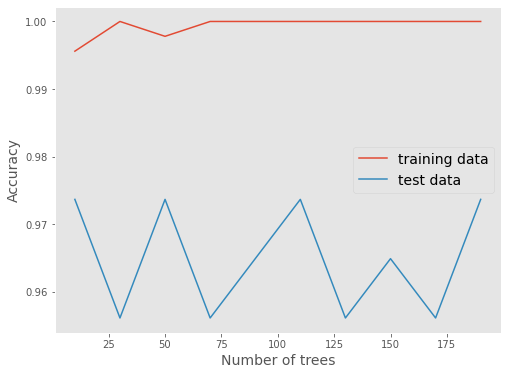

In [25]:
#accuracy with respect to number of trees in forest
n_estimators = []
acc_train = []
acc_test = []

for i in range(10, 201, 20):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(X_train_scaled, y_train)
    acc_train.append(accuracy_score(y_train, rfc.predict(X_train_scaled)))
    acc_test.append(accuracy_score(y_test, rfc.predict(X_test_scaled)))
    
    n_estimators.append(i)
    
plt.figure(figsize=(8, 6))

plt.plot(n_estimators, acc_train, label="training data")
plt.plot(n_estimators, acc_test, label="test data")
plt.xlabel("Number of trees", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.legend(fontsize=14);
plt.grid();

### Hyperparameter tuning with GridSearchCV

In [26]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

rfc = RandomForestClassifier()

grid = {"n_estimators": range(10, 201, 10),
               "max_features": ["sqrt", "log2"],
               "max_depth": range(10, 101, 20)
              }

rfc_rs = GridSearchCV(rfc, 
                            param_grid = grid,
                            cv = 5, 
                            n_jobs = 10, 
                            scoring = "accuracy")

rfc_rs.fit(X_train_scaled, y_train)

#best parameters from gridsearchCV
print(rfc_rs.best_params_)
#best accuracy score
print(rfc_rs.best_score_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 140}
0.9692307692307691


### 2) Training SVM model

In [27]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_scaled, y_train)

SVC()

In [28]:
y_pred_svc = classifier.predict(X_test_scaled)

#accuracy of the model

print('Accuracy :' ,accuracy_score(y_test, y_pred_svc))

Accuracy : 0.9649122807017544


In [29]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        74
           1       0.97      0.93      0.95        40

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



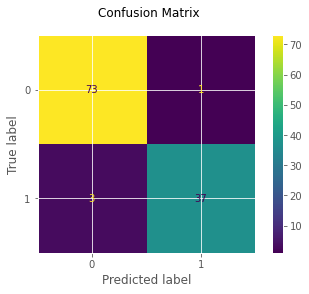

In [30]:
from sklearn.metrics import plot_confusion_matrix

fig = plot_confusion_matrix(classifier, X_test_scaled, y_test, display_labels=classifier.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

### Hyperparameter tuning with GridSearchCV

In [31]:

from sklearn.model_selection import KFold

cv = KFold(n_splits=5, random_state=1, shuffle=True)
  
# defining parameter range
param_grid = {'C': [0.1, 1, 100], 
              'gamma': [1, 0.1, 0.001],
              'kernel': ['rbf','linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, cv=cv)
  
# fitting the model for grid search
grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 100], 'gamma': [1, 0.1, 0.001],
                         'kernel': ['rbf', 'linear']})

In [32]:
print(grid.best_params_) 

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [34]:
grid_predictions_svc = grid.predict(X_test_scaled) 
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, grid_predictions_svc)))
print(classification_report(y_test, grid_predictions_svc))

Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### 3) Training Multilayer Perceptron

In [35]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

print('Accuracy: {:.4f}'.format(accuracy_score(y_test, y_pred)))


Accuracy: 0.9649


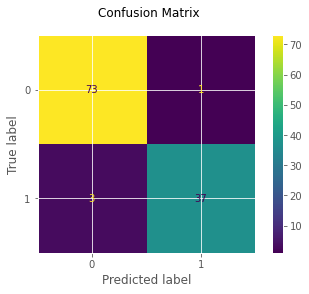

In [36]:
fig = plot_confusion_matrix(mlp, X_test_scaled, y_test, display_labels=mlp.classes_)
fig.figure_.suptitle("Confusion Matrix")
plt.show()

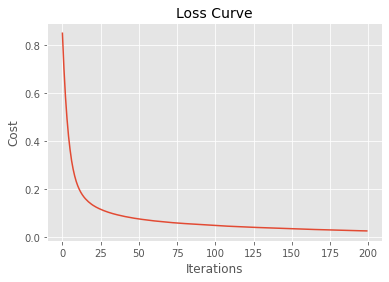

In [37]:
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

### Hyperparameter tuning with GridSearchCV

In [38]:
from sklearn.model_selection import KFold
cv = KFold(n_splits=5, random_state=1, shuffle=True)
param_grid = {
    'hidden_layer_sizes': [3,5,10,15,20],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=cv, verbose=3)
grid.fit(X_train_scaled, y_train)

print(grid.best_params_) 

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'activation': 'tanh', 'hidden_layer_sizes': 15, 'learning_rate': 'constant', 'solver': 'adam'}


In [40]:
grid_predictions = grid.predict(X_test_scaled) 
print('Accuracy: {:.4f}'.format(accuracy_score(y_test, grid_predictions)))
print(classification_report(y_test, grid_predictions))


Accuracy: 0.9649
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        74
           1       0.95      0.95      0.95        40

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



### Comapring the base models without hyperparameter tuning

Random Forest: 0.956129 (0.030882)
SVM: 0.973548 (0.024891)
Multilayer Percptron: 0.977993 (0.019760)


<Figure size 1440x2880 with 0 Axes>

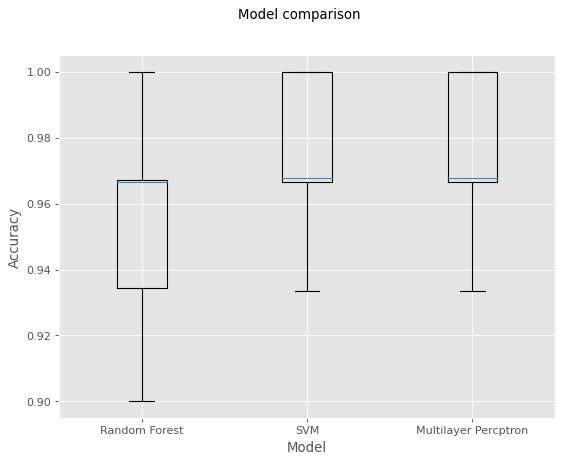

<Figure size 1440x2880 with 0 Axes>

In [65]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV, KFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
from sklearn.model_selection import cross_val_score
# base models

models = []
models.append(('Random Forest', RandomForestClassifier()))
models.append(('SVM', SVC(kernel = 'rbf')))
models.append(('Multilayer Percptron', MLPClassifier()))

results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=15, random_state=None)
    cv_results =cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# comparing the results of all models
from matplotlib.pyplot import figure

fig = plt.figure()
fig = figure(figsize=(8, 6), dpi=80)
fig.suptitle('Model comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()
plt.savefig('my_plot.png')

### Feature selection with Pearson's Correlation Coefficient

<AxesSubplot:>

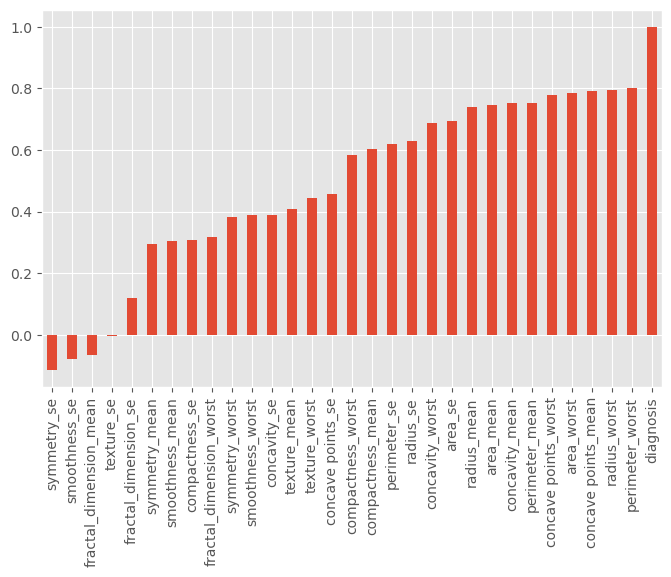

In [66]:
plt.figure(figsize=(8,5),dpi=100)
df1.corr()['diagnosis'].sort_values().plot(kind='bar')

In [42]:
df1.corr()['diagnosis'].sort_values()

symmetry_se               -0.114229
smoothness_se             -0.077830
fractal_dimension_mean    -0.066228
texture_se                -0.003541
fractal_dimension_se       0.120884
symmetry_mean              0.293594
smoothness_mean            0.304018
compactness_se             0.309126
fractal_dimension_worst    0.316421
symmetry_worst             0.383165
smoothness_worst           0.387885
concavity_se               0.390394
texture_mean               0.407111
texture_worst              0.443358
concave points_se          0.457603
compactness_worst          0.583941
compactness_mean           0.602065
perimeter_se               0.618081
radius_se                  0.630331
concavity_worst            0.688232
area_se                    0.695619
radius_mean                0.741254
area_mean                  0.745664
concavity_mean             0.752845
perimeter_mean             0.754245
concave points_worst       0.779945
area_worst                 0.785407
concave points_mean        0

- We will select the features with Correlation coeeficient > 0.5 with our target variable.
- I have selected below features based on the values for further analysis.

- compactness_worst, compactness_mean, perimeter_se, radius_se, concavity_worst, area_se, radius_mean, area_mean, concavity_mean, perimeter_mean, concave points_worst, area_worst, concave points_mean, radius_worst, perimeter_worst

In [47]:
X1 = df1[['compactness_worst', 'compactness_mean', 'perimeter_se', 'radius_se', 'concavity_worst', 'area_se', 'radius_mean', 'area_mean', 'concavity_mean', 'perimeter_mean', 'concave points_worst', 'area_worst', 'concave points_mean', 'radius_worst', 'perimeter_worst']]
y1 = df1[['diagnosis']]

#splitting the data into train-test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X1, y1, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_new)
X_test_sc = scaler.transform(X_test_new)

In [48]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_sc, y_train_new)
y_pred_svc1 = classifier.predict(X_test_sc)
print('Accuracy for SVM model :' ,accuracy_score(y_test_new, y_pred_svc1))

#training MLP classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train_sc, y_train_new)
y_pred1 = mlp.predict(X_test_sc)
print('Accuracy for MLP Classifier',(accuracy_score(y_test_new, y_pred1)))

#training Random forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_sc, y_train_new)
y_pred2 = forest.predict(X_test_sc)
print('Accuracy for Random forest Classifier', (accuracy_score(y_test_new, y_pred2)))

Accuracy for SVM model : 0.9393939393939394
Accuracy for MLP Classifier 0.9595959595959596
Accuracy for Random forest Classifier 0.9292929292929293


### Feature selection with LassoCV

Good alpha value using LassoCV: 0.001178
Good score value using LassoCV: -285712.645007
Feature selected by Lasso is 21 variables and dropped 9 variables


Text(0.5, 1.0, 'Feature importance with Lasso Model')

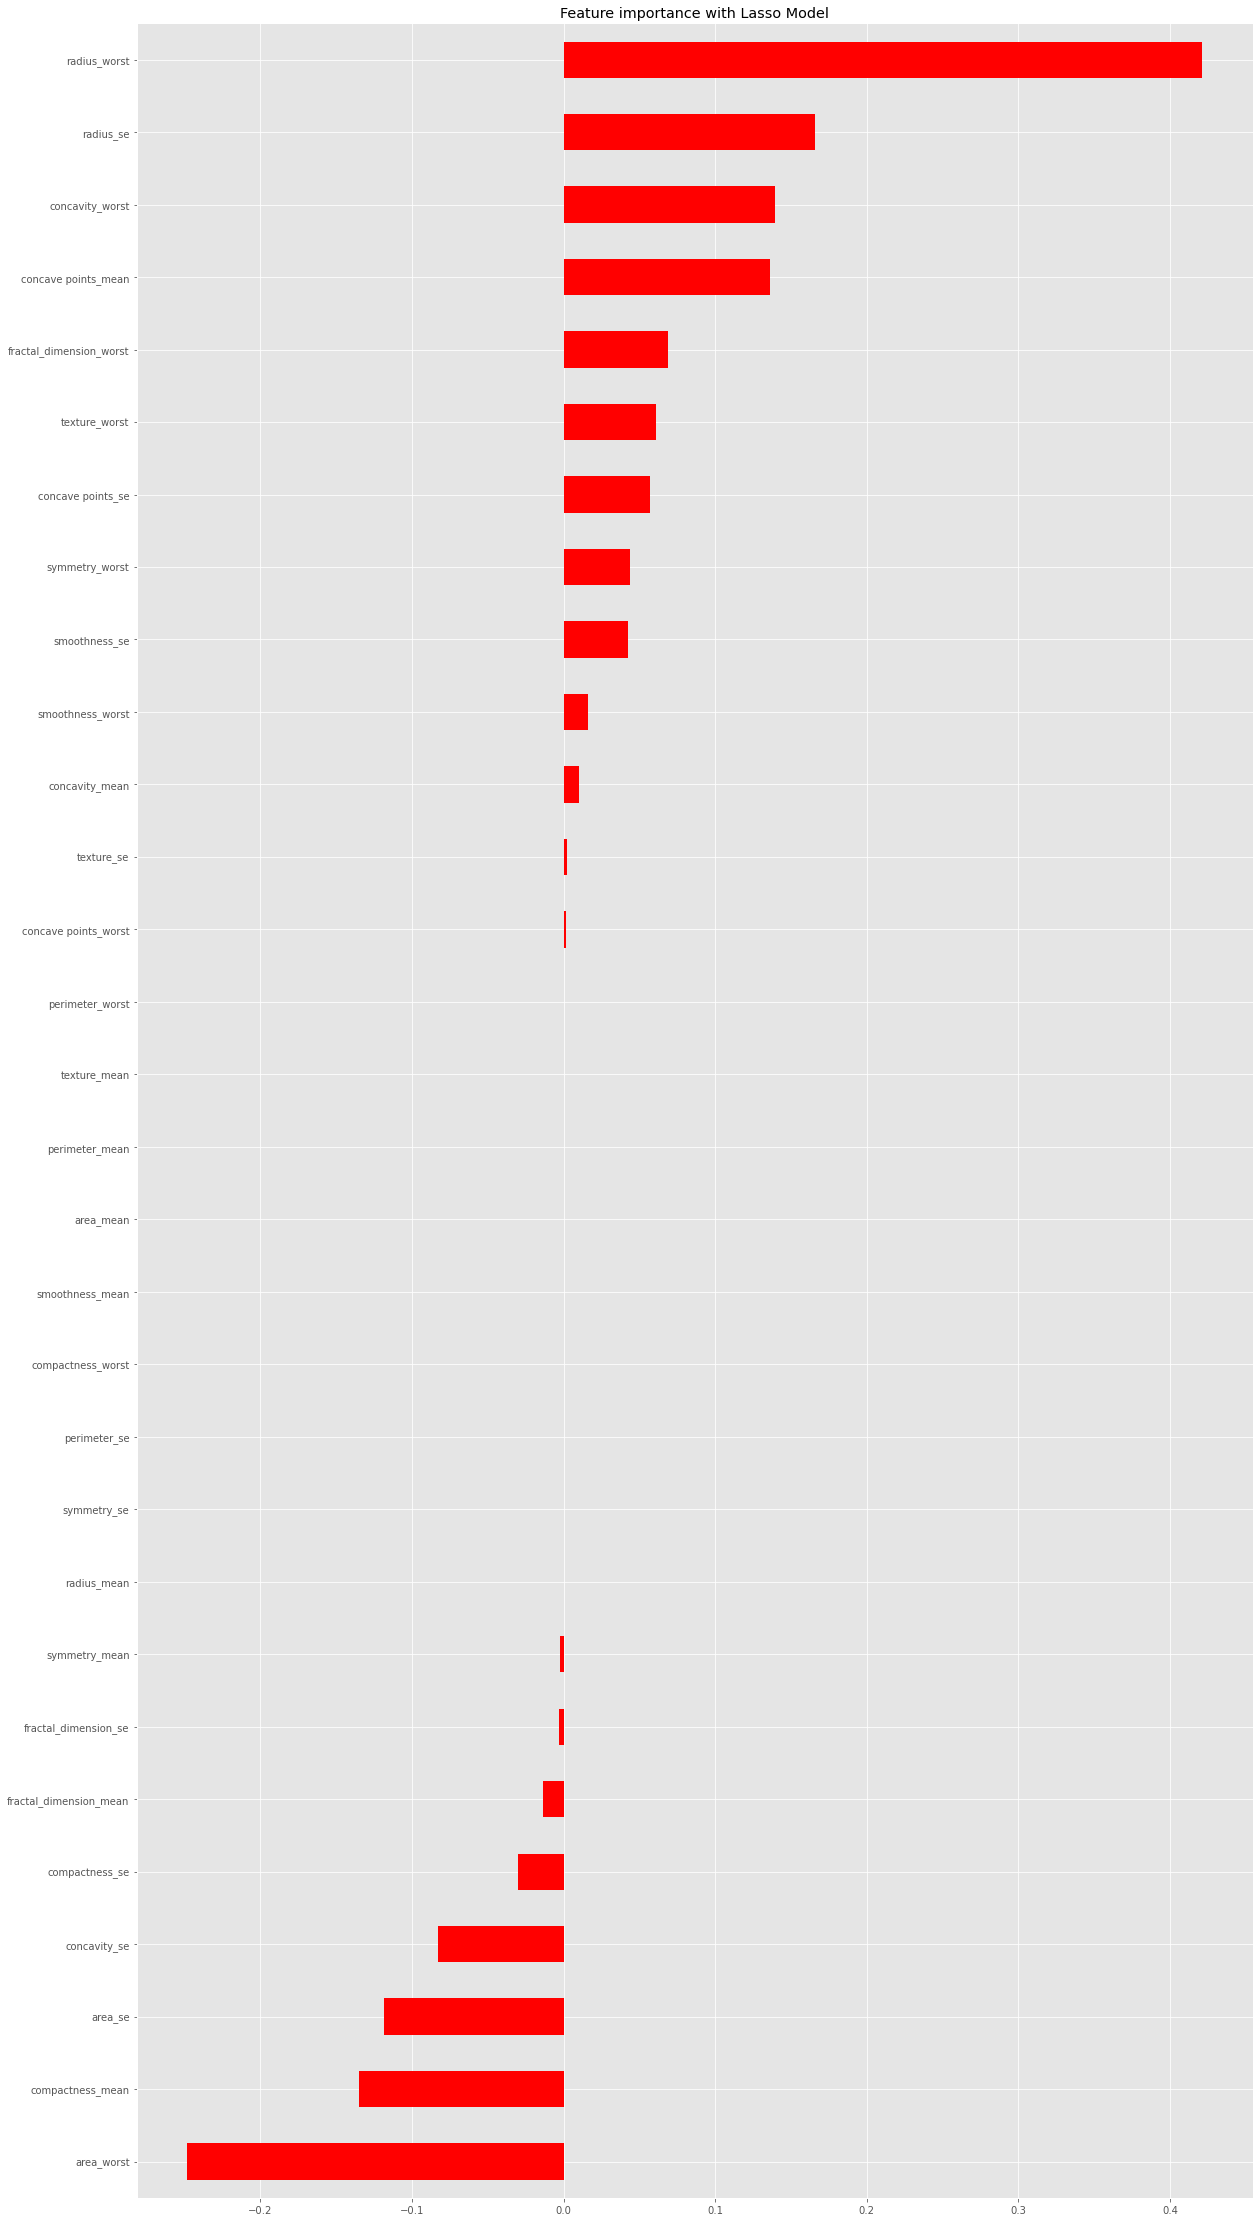

In [50]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.feature_selection import RFE
import matplotlib

# Feature selection using LassoCv
reg = LassoCV()

reg.fit(X_train_scaled, y_train)

print("Good alpha value using LassoCV: %f" % reg.alpha_)
print("Good score value using LassoCV: %f" %reg.score(X,y))

coef = pd.Series(reg.coef_, index = X.columns)

print("Feature selected by Lasso is " + str(sum(coef != 0)) + " variables and dropped " +  str(sum(coef == 0)) + " variables")

imp_coef = coef.sort_values()

matplotlib.rcParams['figure.figsize'] = (20, 40)

imp_coef.plot(kind = "barh", color="red")

plt.title("Feature importance with Lasso Model")

In [51]:
#dropping the variables that are not selected by LassoCV
new_df = df.drop(['radius_mean', 'symmetry_se', 'perimeter_se', 'compactness_worst', 'smoothness_mean', 'area_mean', 'perimeter_mean', 'texture_mean', 'perimeter_worst'], axis=1)
new_df.head()

,diagnosis,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,area_se,...,concavity_se,concave points_se,fractal_dimension_se,radius_worst,texture_worst,area_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,153.40,...,0.05373,0.01587,0.006193,25.38,17.33,2019.0,0.7119,0.2654,0.4601,0.11890
1,1,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,74.08,...,0.01860,0.01340,0.003532,24.99,23.41,1956.0,0.2416,0.1860,0.2750,0.08902
2,1,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,94.03,...,0.03832,0.02058,0.004571,23.57,25.53,1709.0,0.4504,0.2430,0.3613,0.08758
3,1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,27.23,...,0.05661,0.01867,0.009208,14.91,26.50,567.7,0.6869,0.2575,0.6638,0.17300
4,1,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,94.44,...,0.05688,0.01885,0.005115,22.54,16.67,1575.0,0.4000,0.1625,0.2364,0.07678


In [52]:
# defining target variable

X2 = new_df.iloc[0:].drop('diagnosis',axis=1)
y2 = new_df[['diagnosis']]

#splitting the data into train-test
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X2, y2, test_size=0.20)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_new)
X_test_sc = scaler.transform(X_test_new)

In [54]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf')
classifier.fit(X_train_sc, y_train_new)
y_pred_svc1 = classifier.predict(X_test_sc)
print('Accuracy for SVM model :' ,accuracy_score(y_test_new, y_pred_svc1))

#training MLP classifier
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train_sc, y_train_new)
y_pred1 = mlp.predict(X_test_sc)
print('Accuracy for MLP Classifier',(accuracy_score(y_test_new, y_pred1)))

#training Random forest model
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_train_sc, y_train_new)
y_pred2 = forest.predict(X_test_sc)
print('Accuracy for Random forest Classifier', (accuracy_score(y_test_new, y_pred2)))

Accuracy for SVM model : 0.9824561403508771
Accuracy for MLP Classifier 0.9912280701754386
Accuracy for Random forest Classifier 0.9385964912280702


### LassoCV performs better in our case rather than Pearson's Correlation coefficient method of feature selection